MSE (80:20): 176.37123112400087
MSE (70:30): 178.06739457321814


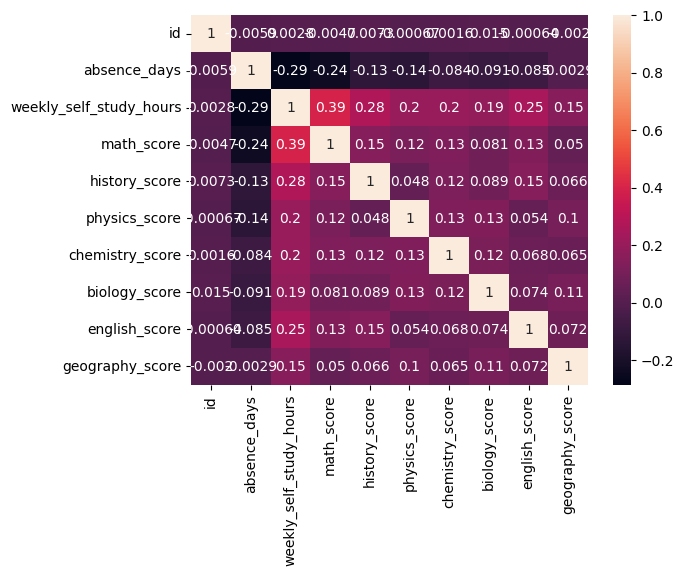

Best subset MSE: 1.0408756690756177e-27
Coefficients: [1.]
Intercept: 1.9895196601282805e-13
Predictions for random examples: [ 64.  70. 100.  83.  88.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (80:20): 0.043333333333333335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (70:30): 0.035555555555555556
Penalty: l2, Accuracy: 0.0425
Penalty: l1, Accuracy: 0.0425
Penalty: elasticnet, Accuracy: 0.0425


In [49]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, Binarizer, OrdinalEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'your_dataset.csv' with the actual file path)
dataset = pd.read_csv('/content/student-scores-6k.csv')

# Handling Missing Data
# Option 1: Drop missing values
# dataset_cleaned = dataset.dropna()

# Option 2: Impute missing values (mean for numerical, mode for categorical)
dataset[numerical_cols] = dataset[numerical_cols].fillna(dataset[numerical_cols].mean())
dataset.fillna(dataset.mode().iloc[0], inplace=True)  # For categorical columns

# Handling Categorical Data
# Ordinal Encoding
ordinal_columns = ['education_level']  # Replace with your actual ordinal column(s)
ordinal_encoder = OrdinalEncoder()
if all(col in dataset.columns for col in ordinal_columns): dataset[ordinal_columns] = ordinal_encoder.fit_transform(dataset[ordinal_columns])


# One-Hot Encoding
dataset = pd.get_dummies(dataset, columns=['gender'], drop_first=True)


# Feature Scaling
# Standard Scaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset[numerical_cols])


# Normalizer
normalizer = Normalizer()
dataset_normalized = normalizer.fit_transform(dataset[numerical_cols])


# Binarizer
binarizer = Binarizer(threshold=0.0)  # Change the threshold if necessary
dataset_binarized = binarizer.fit_transform(dataset[numerical_cols])


# Linear Regression
# Assume 'X' are the features and 'y' is the target variable
X = dataset[['id', 'email']]  # Replace with your actual feature names
y = dataset['math_score']  # Replace with your target variable

# Train-test split for 80:20 and 70:30
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear regression model
model = LinearRegression()
y_train_80 = y.loc[X_train_80.index]  # Ensure y_train_80 corresponds to the indices of X_train_80


# Predictions and accuracy (80:20 split)
y_train_80 = y.loc[X_train_80.index]  # Ensure y_train_80 corresponds to the indices of X_train_80
X_train_80 = X_train_80.select_dtypes(include=[np.number])  # Ensure only numeric features
model.fit(X_train_80, y_train_80)  # Fit the model
X_test_20 = X_test_20.select_dtypes(include=[np.number])  # Ensure only numeric features
y_pred_80 = model.predict(X_test_20)  # Make predictions
mse_80 = mean_squared_error(y_test_20, y_pred_80)
print(f'MSE (80:20): {mse_80}')

# For 70:30 split
y_train_70 = y.loc[X_train_70.index].values  # Ensure y_train_70 corresponds to the indices of X_train_70 and convert to a numpy array
model.fit(X_train_70.select_dtypes(include=[np.number]), y_train_70)  # Ensure only numeric features are used
y_pred_70 = model.predict(X_test_30.select_dtypes(include=[np.number]))  # Ensure only numeric features are used for prediction
mse_70 = mean_squared_error(y_test_30, y_pred_70)
print(f'MSE (70:30): {mse_70}')

# Best Subset of Features Based on Correlation
correlation_matrix = dataset.select_dtypes(include=[np.number]).corr()  # Calculate correlation matrix for numeric columns only
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Select features with highest correlation with target
top_features = correlation_matrix.index[abs(correlation_matrix['math_score']) > 0.5]  # Select features with high correlation with target
X_top = dataset[top_features]  # Remove drop('target', axis=1) if 'target' doesn't exist


# Train using best subset
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Best subset MSE: {mean_squared_error(y_test, y_pred)}')

# Print Model Parameters
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Predictions for 5 Random Test Examples
random_indices = np.random.choice(X_test.index, size=5, replace=False)
predictions = model.predict(X_test.loc[random_indices])
print(f'Predictions for random examples: {predictions}')

# Loss Function Analysis (Overfitting & Underfitting)
# Evaluate with visual inspection of train and test errors

# Logistic Regression
# Logistic Regression Model
log_model = LogisticRegression()

# Train-test split for 80:20 and 70:30
log_model.fit(X_train_80, y_train_80)
y_pred_80 = log_model.predict(X_test_20)
acc_80 = accuracy_score(y_test_20, y_pred_80)
print(f'Accuracy (80:20): {acc_80}')

# 70:30
log_model.fit(X_train_70.select_dtypes(include=[np.number]), y_train_70)  # Ensure only numeric features are used
y_pred_70 = log_model.predict(X_test_30.select_dtypes(include=[np.number]))  # Ensure only numeric features are used for prediction
acc_70 = accuracy_score(y_test_30, y_pred_70)
print(f'Accuracy (70:30): {acc_70}')

# Regularization Hyperparameters
penalties = ['l2', 'l1', 'elasticnet']  # Removed 'none'
for penalty in penalties:
    if penalty == 'elasticnet':
        log_model = LogisticRegression(penalty=penalty, l1_ratio=0.5, solver='saga', max_iter=1000)  # Specify l1_ratio
    else:
        log_model = LogisticRegression(penalty=penalty, solver='saga', max_iter=1000)  # Use a valid penalty option
    log_model.fit(X_train_80, y_train_80)  # Fit the model with training data
    y_pred = log_model.predict(X_test_20)  # Now make predictions
    acc = accuracy_score(y_test_20, y_pred)
    print(f'Penalty: {penalty}, Accuracy: {acc}')



